In [1]:
### Audio classification uding ml
###Dataset https://urbansounddataset.weebly.com/download-urbansound8k.html
## Dataset

##The dataset for this project is hosted on [https://urbansounddataset.weebly.com ](https://zenodo.org/records/1203745/files/UrbanSound8K.tar.gz). 
##Please download it and place it in the `dataset/` directory.


import requests

def download_file(url, local_filename):
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)  

download_file('https://zenodo.org/records/1203745/files/UrbanSound8K.tar.gz', 'dataset.zip')


In [19]:
# %pip install librosa
# !pip install numpy scipy scikit-learn
# !pip install resampy



'-m' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import IPython.display as ipd
###display rich media such as audio, video, images, and HTML. 
import librosa 
import librosa.display

In [4]:
import matplotlib.pyplot as plt ###To display the signals the audio
%matplotlib inline
 ### ensure that plots generated by Matplotlib are displayed directly within the notebook cells. 

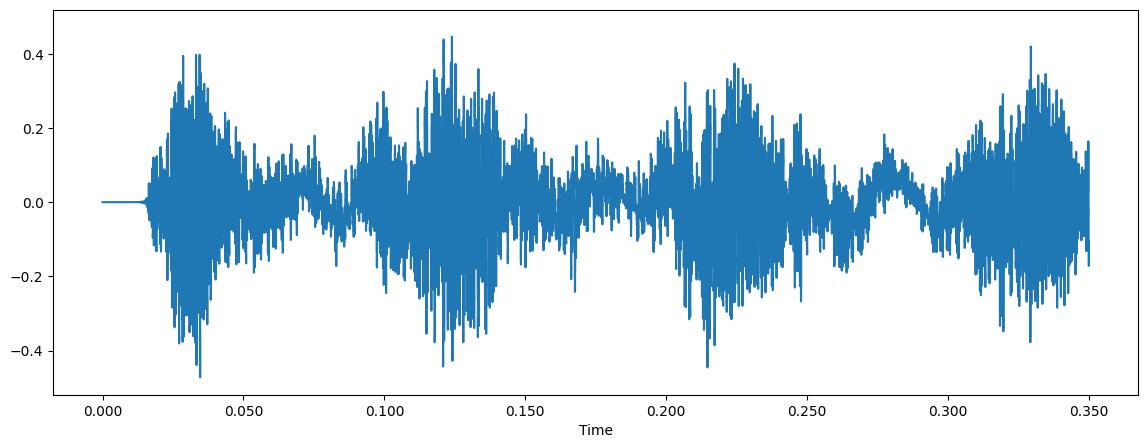

In [5]:
audio_file_path = 'UrbanSound8K/audio/4201-3-2-0.wav'

# Create a figure for the plot
plt.figure(figsize=(14,5))

# Load the audio file
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)   # This loads the audio file and returns the audio data and sample rate

# Plot the waveform of the audio file
librosa.display.waveshow(librosa_audio_data, sr=librosa_sample_rate)  # Visualizes the waveform of the audio

# Display the audio file in an audio player
ipd.Audio(audio_file_path)  # Allows you to play the audio file directly within the Jupyter notebook

In [6]:
librosa_sample_rate,librosa_audio_data

(22050,
 array([ 3.7252903e-08, -7.4505806e-09,  7.4505806e-09, ...,
        -1.1671661e-01, -1.7172906e-01, -1.0471621e-01], dtype=float32))

In [7]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 


wave_sample_rate
wave_audio



array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-7263, -3249],
       [-5536, -4567],
       [-3393, -5615]], dtype=int16)

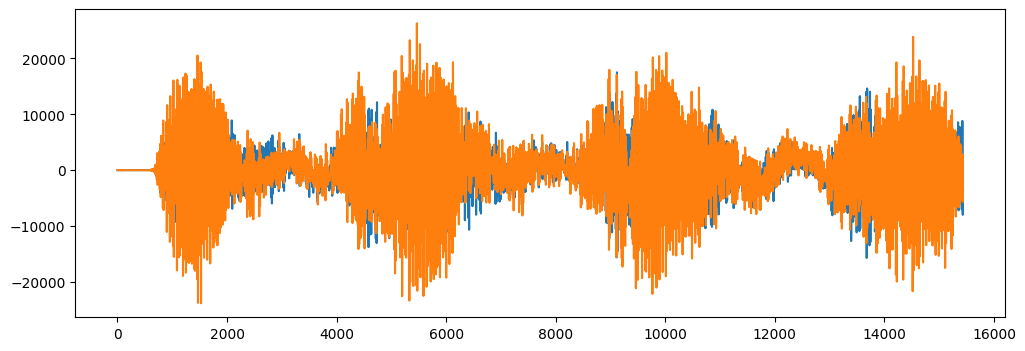

In [8]:


import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)



In [9]:
import pandas as pd
metadata=pd.read_csv('UrbanSound8K\\metadata\\UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [11]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 16)


In [12]:
mfccs

array([[-3.61135406e+02, -2.21786911e+02, -1.73730423e+02,
        -1.54593582e+02, -1.33629196e+02, -1.20035881e+02,
        -1.19458534e+02, -1.28605179e+02, -1.44353455e+02,
        -1.51411041e+02, -1.54926682e+02, -1.59223022e+02,
        -1.78185272e+02, -1.78743698e+02, -1.71949585e+02,
        -1.95211288e+02],
       [-3.90831757e+00,  1.37876663e+01,  3.76595306e+01,
         7.17377396e+01,  8.21648560e+01,  7.82796021e+01,
         8.24187775e+01,  9.07393799e+01,  8.70464478e+01,
         6.56073761e+01,  5.13463478e+01,  5.36858330e+01,
         5.84078293e+01,  5.13486023e+01,  4.13395958e+01,
         3.38973923e+01],
       [-5.76896515e+01, -6.44338913e+01, -6.25108490e+01,
        -4.17910576e+01, -4.38227425e+01, -6.25590668e+01,
        -7.00431366e+01, -5.63174820e+01, -4.91782837e+01,
        -5.94616470e+01, -6.88539734e+01, -6.97436600e+01,
        -5.62887688e+01, -5.63689117e+01, -6.57616272e+01,
        -7.73782959e+01],
       [ 1.01524719e+02,  8.98115692e

In [2]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import numpy as np



audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [5]:
def features_extractor(audio_file_name):
    audio_file_data, audio_sample_rate = librosa.load(audio_file_name, sr=None)  # Use original sample rate
    mfccs_features = librosa.feature.mfcc(y=audio_file_data, sr=audio_sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features


In [6]:
import librosa


import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    audio_file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    audio_file_data=features_extractor(audio_file_name)
    extracted_features.append([audio_file_data,final_class_labels])



2847it [00:57, 55.37it/s]c:\Users\mkuma\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
8732it [02:53, 50.46it/s]


In [7]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-275.91843, 119.49279, -98.21178, -66.51514, ...",dog_bark
1,"[-500.9084, 185.10641, -86.53282, 49.85885, 9....",children_playing
2,"[-531.1953, 186.93994, -70.34916, 40.429245, 9...",children_playing
3,"[-476.78442, 160.33328, -62.952843, 50.75117, ...",children_playing
4,"[-521.2447, 185.39265, -81.95047, 46.47355, 11...",children_playing


In [8]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [9]:
X.shape

(8732, 40)

In [13]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [14]:
### Label Encoding
y=np.array(pd.get_dummies(y))

In [16]:
y.shape

(8732, 10)

In [17]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
X_train

array([[-1.8378271e+02,  1.5365129e+02, -3.6178787e+01, ...,
         1.0025054e+00, -4.7213894e-01, -1.2038716e+00],
       [-8.4152161e+01,  1.6649818e+02, -6.1209232e+01, ...,
        -4.0521545e+00, -3.3977330e+00, -8.2560587e+00],
       [-6.7970741e+01,  2.6627291e+01, -4.8024197e+01, ...,
        -4.1831975e+00,  2.3861418e+00,  4.4640236e+00],
       ...,
       [-4.7486859e+02,  9.3468300e+01,  3.2284161e+01, ...,
        -1.1071193e+00, -1.5656761e+00, -9.8130512e-01],
       [-2.0102074e+02,  1.7294638e+02, -3.5023716e+01, ...,
         4.1071025e-01, -1.1205076e+00,  4.3810743e-01],
       [-4.8265601e+02,  2.3059308e+02,  2.8331995e+01, ...,
         7.3604614e-01, -1.9397885e+00, -4.5186172e+00]], dtype=float32)

In [19]:
y

array([[False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [20]:
X_train.shape

(6985, 40)

In [21]:
X_test.shape

(1747, 40)

In [22]:
y_train.shape

(6985, 10)

In [23]:
y_test.shape

(1747, 10)